In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
daily_gains = pd.read_csv('../Data/daily_return_day_padded.csv', skiprows=1, header=None, names=['date', 'daily_return'])
daily_sent_scores = pd.read_csv('../Data/avg_tweet_sent_score_day_padded.csv', skiprows=1, header=None, names=['date', 'avg_sent_score'])

daily_gains['date'] = pd.to_datetime(daily_gains['date'])
daily_sent_scores['date'] = pd.to_datetime(daily_sent_scores['date'])

data = pd.merge(daily_gains, daily_sent_scores, on='date')
data.set_index('date', inplace=True)

# Make sure the columns are named appropriately
data.columns = ['daily_return', 'avg_sent_score']


In [4]:
data.index.freq = 'D'

In [29]:
train_data = data.iloc[:]
test_data = data.iloc[:]

In [30]:
model = SARIMAX(train_data.daily_return, exog=train_data['avg_sent_score'], order=(3, 1, 0))

results = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.31568D+00    |proj g|=  4.96664D-02


 This problem is unconstrained.



At iterate    5    f= -2.31570D+00    |proj g|=  3.59226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      9      1     0     0   3.592D-04  -2.316D+00
  F =  -2.3156993518955931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


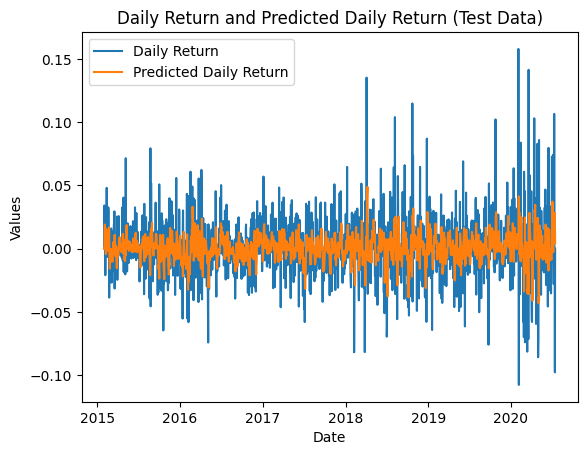

In [31]:
predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data['avg_sent_score'])
plt.plot(test_data['daily_return'], label='Daily Return')
plt.plot(predictions, label='Predicted Daily Return')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Daily Return and Predicted Daily Return (Test Data)')
plt.show()



In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data['daily_return'], predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.028790311181013606


In [17]:
#now, separate train data and test data.
#train without the last 30 days, and test for the last 30 days.

train_data = data.iloc[:-30]
test_data = data.iloc[-30:]

model = SARIMAX(train_data.daily_return, exog=train_data['avg_sent_score'], order=(3, 1, 0))

results = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.33627D+00    |proj g|=  9.12992D-02


 This problem is unconstrained.



At iterate    5    f= -2.33635D+00    |proj g|=  2.06667D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     25      1     0     0   2.067D-03  -2.336D+00
  F =  -2.3363471373985254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


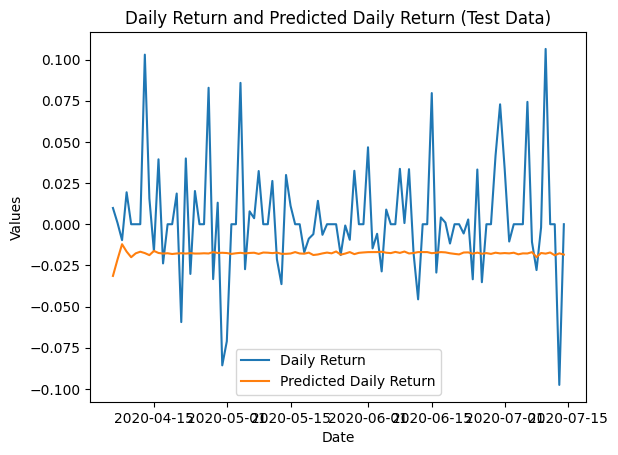

In [16]:
predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data['avg_sent_score'])
plt.plot(test_data['daily_return'], label='Daily Return')
plt.plot(predictions, label='Predicted Daily Return')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Daily Return and Predicted Daily Return (Test Data)')
plt.show()



In [14]:
mae = mean_absolute_error(test_data['daily_return'], predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.028790311181013606
